In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graph
from graph import LocMap, ConflictGraph, DistMatrixReconstruction
from collections import defaultdict
from labellines import labelLine, labelLines

from cvxpy import *

In [3]:
def construct_edges(node_num, p2p_graph, dist_matrix, num_edges):
    link_edges = defaultdict(dict)
    edge_no = 0
    
    labels = {}
    comm_edges_list = []

    for node_u in range(node_num):
        for node_v in range(node_u+1, node_num):
            if p2p_graph[node_u][node_v] == 1:
                link_edges[edge_no] = {'u':node_u, 'v':node_v, 'dist':dist_matrix[node_u][node_v]}
                edge_no += 1               

    assert (edge_no == num_edges)
    
    for edge_no in range(int(num_edges)):
        node_u = link_edges[edge_no]['u']
        node_v = link_edges[edge_no]['v']
        dist = link_edges[edge_no]['dist']
    
        comm_edges_list.append([node_u, node_v])
        labels[tuple([node_u, node_v])] = edge_no
    
    return link_edges, comm_edges_list, labels

def construct_conflict_edges(node_num, p2p_graph):
    
    conflict_edges_dict = defaultdict(dict)
    edge_no = 0

    conflict_edges_list = []

    for node_u in range(node_num):
        for node_v in range(node_u+1, node_num):
            if p2p_graph[node_u][node_v] == 1:
                conflict_edges_dict[edge_no] = {'u':node_u, 'v':node_v}
                edge_no += 1               
    
    for edge_no in range(len(conflict_edges_dict)):
        node_u = conflict_edges_dict[edge_no]['u']
        node_v = conflict_edges_dict[edge_no]['v']
    
        conflict_edges_list.append([node_u, node_v])
    
    return conflict_edges_dict, conflict_edges_list

In [4]:
node_num = 12

nodes_pos = graph.generate_nodes_pos(node_num, -20, 20)

complete_dist_graph = graph.generate_complete_dist_graph(nodes_pos)

# nodes_pos = np.array([[0,0], [2,0], [0, -1], [6, -1], [6, 3], [4,4]])

In [55]:
loc_pos = LocMap(nodes_pos, K=4)
loc_pos.BFS(random.randint(0, node_num))
S = loc_pos.bilateration_ordering_check()

p2p_graph = loc_pos.get_graph()
dist_matrix = loc_pos.get_dist_matrix()

link_edges, comm_edges_list, labels = construct_edges(node_num, p2p_graph, dist_matrix, np.count_nonzero(p2p_graph == 1)/2)


In [83]:
print (link_edges)

defaultdict(<class 'dict'>, {0: {'u': 0, 'v': 5, 'dist': 22.13274}, 1: {'u': 0, 'v': 6, 'dist': 24.865913}, 2: {'u': 0, 'v': 8, 'dist': 7.946694}, 3: {'u': 0, 'v': 10, 'dist': 12.259188}, 4: {'u': 1, 'v': 2, 'dist': 11.965034}, 5: {'u': 1, 'v': 3, 'dist': 11.040427}, 6: {'u': 1, 'v': 4, 'dist': 4.4603715}, 7: {'u': 1, 'v': 10, 'dist': 18.001429}, 8: {'u': 2, 'v': 3, 'dist': 5.371083}, 9: {'u': 2, 'v': 4, 'dist': 15.268311}, 10: {'u': 2, 'v': 11, 'dist': 5.931467}, 11: {'u': 3, 'v': 4, 'dist': 12.895781}, 12: {'u': 3, 'v': 7, 'dist': 7.9813213}, 13: {'u': 3, 'v': 11, 'dist': 6.5907054}, 14: {'u': 4, 'v': 10, 'dist': 13.552347}, 15: {'u': 5, 'v': 6, 'dist': 20.395805}, 16: {'u': 5, 'v': 8, 'dist': 14.37847}, 17: {'u': 5, 'v': 9, 'dist': 16.639984}, 18: {'u': 6, 'v': 7, 'dist': 11.081929}, 19: {'u': 6, 'v': 8, 'dist': 19.563042}, 20: {'u': 6, 'v': 9, 'dist': 19.23745}, 21: {'u': 6, 'v': 11, 'dist': 16.761332}, 22: {'u': 7, 'v': 9, 'dist': 22.682274}, 23: {'u': 7, 'v': 11, 'dist': 6.982731

In [56]:
p2p_graph

array([[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]], dtype=uint8)

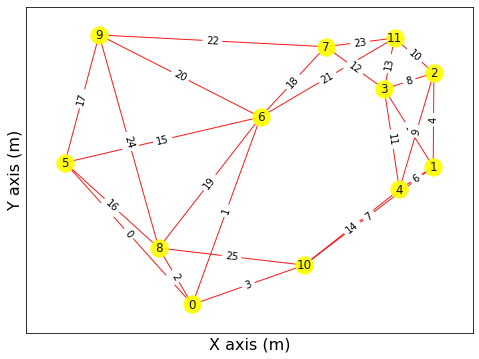

In [57]:
# node_idx = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
#             'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
#             'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AG', 'AI',
#             'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS',
#             'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC',
#             'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM',
#             'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW',
#             'BX', 'BY', 'BZ']

node_idx = [x for x in range(nodes_pos.shape[0])]

G = nx.Graph()
G.add_edges_from(comm_edges_list)
pos = nodes_pos
# pos = {0: (0, 0), 1: (2, 0), 2: (0, -1), 3: (6, -1), 4: (6, 3), 5: (4, 4)} 
plt.figure(figsize=(8,6))

plt.xlabel('X axis (m)', fontsize=16)
plt.ylabel('Y axis (m)', fontsize=16)

nx.draw(
    G, pos, edge_color='red', width=1, linewidths=1,
    node_size=300, node_color='Yellow', alpha=0.9,
    labels={node: node_idx[node] for node in G.nodes()}
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=labels,
    font_color='black'
)

plt.axis('on')
plt.show()

In [58]:
K = dist_matrix * p2p_graph
noise = np.random.normal(0, 0.3, (12,12)) * p2p_graph

In [100]:
np.allclose(K, K.T, rtol=0.01, atol=0.01)

True

In [96]:
recon = DistMatrixReconstruction(K + noise, node_num)

D = recon.EDM_Completion(1, 0.05)

LinAlgError: Singular matrix

In [72]:
def rmse(A,B):
    rmse = np.sqrt(np.mean(((A-B)**2)))
    return rmse

rmse(D, dist_matrix)

11.908014983778374

In [76]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", normalized_stress='auto')

node_locations = mds.fit_transform(K)
e = mds_relative_to_absolute_scale(node_locations, [0, 1, 2], nodes_pos[:3])

A: 
[[ 4.9482397   3.04401987 -2.59884454]
 [-0.36246602  1.54630729 -0.91637896]]
B: 
[[ -5.7074163   18.36947169  18.43383687]
 [-15.45637765   2.12724979  14.09211006]]
12


In [77]:
e

array([[ -2.48943718, -13.92907555],
       [ 13.43406267, -10.86190647],
       [ 20.15126677,  25.55396422],
       [  6.57666472,  27.35775674],
       [ 22.10119299, -10.81109231],
       [ 36.55137312,  14.03306702],
       [ 20.60781331,  61.95748874],
       [ 34.67137636,   0.21250558],
       [ 36.49089196, -21.69555778],
       [-21.91026303,  10.15956214],
       [ 14.47245541,  38.00147378],
       [ 11.00531334,  -5.7907503 ]])

In [78]:
nodes_pos

array([[ -5.7074163 , -15.45637765],
       [ 18.36947169,   2.12724979],
       [ 18.43383687,  14.09211006],
       [ 13.4767393 ,  12.02432996],
       [ 14.98888793,  -0.78248703],
       [-18.44046272,   2.64687368],
       [  1.11038807,   8.45661354],
       [  7.60816176,  17.4337006 ],
       [ -9.06318677,  -8.25299313],
       [-15.02454137,  18.93246798],
       [  5.47637565, -10.43537387],
       [ 14.50357026,  18.53455375]])

A: 
[[ 22.50863214  -3.81682178 -14.61127595]
 [ -0.3340645  -14.32869823  -9.16720323]]
B: 
[[ -5.7074163   18.36947169  18.43383687]
 [-15.45637765   2.12724979  14.09211006]]
12


In [43]:
re_cp = graph.generate_complete_dist_graph(node_locations)
sa_cp = graph.generate_complete_dist_graph(nodes_pos)
e_cp = graph.generate_complete_dist_graph(e)

In [44]:
e

array([[ -5.70742501, -15.45639389],
       [ 18.36946052,   2.12726624],
       [ 18.43385674,  14.09210985],
       [ 13.476716  ,  12.02438136],
       [ 14.98886585,  -0.78245714],
       [-18.4404962 ,   2.64679056],
       [  1.11034324,   8.45671075],
       [  7.60815394,  17.43376755],
       [ -9.06318009,  -8.25301616],
       [-15.02464021,  18.93241711],
       [  5.47637729, -10.43536483],
       [ 14.50359956,  18.53457869]])

In [45]:
nodes_pos

array([[ -5.7074163 , -15.45637765],
       [ 18.36947169,   2.12724979],
       [ 18.43383687,  14.09211006],
       [ 13.4767393 ,  12.02432996],
       [ 14.98888793,  -0.78248703],
       [-18.44046272,   2.64687368],
       [  1.11038807,   8.45661354],
       [  7.60816176,  17.4337006 ],
       [ -9.06318677,  -8.25299313],
       [-15.02454137,  18.93246798],
       [  5.47637565, -10.43537387],
       [ 14.50357026,  18.53455375]])

In [46]:
node_locations

array([[ 22.50863214,  -0.3340645 ],
       [ -3.81682178, -14.32869823],
       [-14.61127595,  -9.16720323],
       [-10.58820478,  -5.60861199],
       [  0.27616533, -12.55603998],
       [ 11.77335312,  19.02075269],
       [ -1.98329613,   3.9627297 ],
       [-12.8956984 ,   2.03185878],
       [ 17.49068015,   5.82789483],
       [ -4.37109672,  23.05135453],
       [ 13.11181783,  -8.20728949],
       [-16.89425482,  -3.69268312]])

In [ ]:
rmse(e_cp, sa_cp)

In [ ]:
re_cp

In [ ]:
sa_cp

In [41]:
def euclidean_dist(pos_a, pos_b):
    return math.dist(pos_a, pos_b)

def mds_relative_to_absolute_scale(estimated_coordinates, indices_of_anchors, anchors_true_coordinates):
    A = np.transpose(estimated_coordinates[indices_of_anchors,:])
    B = np.transpose(anchors_true_coordinates)
    estimated_coordinates = np.transpose(estimated_coordinates)

    assert (A.shape == B.shape)
    
    print ("A: \n{}".format(A))
    print ("B: \n{}".format(B))

    all_estimate_coordinates = estimated_coordinates
    num_of_points = estimated_coordinates.shape[1]
    
    print (num_of_points)
    
    def rigid_transform_3D(A,B):
        dimension, num_anchors = A.shape
        
        # find scale
        anchor_dist_A = np.zeros((num_anchors, num_anchors))
        anchor_dist_B = np.zeros((num_anchors, num_anchors))

        for i in range(num_anchors):
            for j in range(num_anchors):
                anchor_dist_A[i][j] = euclidean_dist(A[:, i], A[:, j])
                anchor_dist_B[i][j] = euclidean_dist(B[:, i], B[:, j])
        
        scale_matrix = np.divide(anchor_dist_B, anchor_dist_A, out=np.zeros_like(anchor_dist_A), where=anchor_dist_B!=0)
        total_n = 0
        cnt = 0
        for i in range(0, scale_matrix.shape[1]):
            for j in range(i+1, scale_matrix.shape[1]):
                total_n += scale_matrix[i, j]
                cnt += 1
        scale = total_n / cnt
        A = scale*A

        # find rotation
        centroid_A = np.expand_dims(np.mean(A, axis=1), axis=1)
        centroid_B = np.expand_dims(np.mean(B, axis=1), axis=1)
        
        diff_A = A - np.tile(centroid_A, (1, num_anchors))
        diff_B = B - np.tile(centroid_B, (1, num_anchors))

        H = diff_A @ np.transpose(diff_B)

        u, _, v = np.linalg.svd(H)

        rotation = v.T @ u.T

        # find translation
        translation = np.matmul(-rotation, centroid_A) + centroid_B

        return rotation, translation, scale

    rotation, translation, scale = rigid_transform_3D(A, B)
    
    # print ("Rotation: \n{},\nTranslation: \n{},\nScale: {}".format(rotation, translation, scale))

    estimated_coord_mds = np.matmul(rotation, (scale*all_estimate_coordinates)) + np.tile(translation, (1, num_of_points))

    return np.transpose(estimated_coord_mds)

In [ ]:
e = mds_relative_to_absolute_scale(node_locations, [0, 1, 2], nodes_pos[:3])


print ()
print (nodes_pos)
print (e)


In [ ]:
node_idx = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
            'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
            'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AG', 'AI',
            'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS',
            'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC',
            'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM',
            'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW',
            'BX', 'BY', 'BZ']

G = nx.Graph()
G.add_edges_from(comm_edges_list)
pos = nodes_pos
# pos = {0: (0, 0), 1: (2, 0), 2: (0, -1), 3: (6, -1), 4: (6, 3), 5: (4, 4)} 
plt.figure(figsize=(8,6))

plt.xlabel('X axis (m)', fontsize=16)
plt.ylabel('Y axis (m)', fontsize=16)

nx.draw(
    G, pos, edge_color='red', width=1, linewidths=1,
    node_size=300, node_color='Yellow', alpha=0.9,
    labels={node: node_idx[node] for node in G.nodes()}
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=labels,
    font_color='black'
)

plt.axis('on')
plt.show()

In [ ]:
node_idx = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
            'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
            'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AG', 'AI',
            'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS',
            'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC',
            'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM',
            'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW',
            'BX', 'BY', 'BZ']

G = nx.Graph()
G.add_edges_from(comm_edges_list)
pos = e
# pos = {0: (0, 0), 1: (2, 0), 2: (0, -1), 3: (6, -1), 4: (6, 3), 5: (4, 4)} 
plt.figure(figsize=(8,6))

plt.xlabel('X axis (m)', fontsize=16)
plt.ylabel('Y axis (m)', fontsize=16)

nx.draw(
    G, pos, edge_color='red', width=1, linewidths=1,
    node_size=300, node_color='Yellow', alpha=0.9,
    labels={node: node_idx[node] for node in G.nodes()}
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=labels,
    font_color='black'
)

plt.axis('on')
plt.show()

In [90]:
conf_graph_obj = ConflictGraph(node_num, nodes_pos, dist_matrix, p2p_graph, link_edges)

conf_graph_obj.construct_conflict_graph()
conf_graph_obj.construct_independent_sets_by_edges()

conf_graph = conf_graph_obj.get_conflict_graph()
independent_sets = conf_graph_obj.get_independent_sets()

print (conf_graph)

_, conf_links = construct_conflict_edges(len(link_edges), conf_graph)

[[0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1]
 [0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0]
 [0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0]
 [0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]
 [0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0]
 [0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
 [0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0]
 [0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
 [0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0]
 [0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1]
 [1 1 0 0 

In [91]:
print (conf_links)

[[0, 1], [0, 2], [0, 3], [0, 7], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 24], [0, 25], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [2, 3], [2, 7], [2, 14], [2, 15], [2, 16], [2, 17], [2, 19], [2, 24], [2, 25], [3, 7], [3, 9], [3, 14], [3, 15], [3, 16], [3, 19], [3, 24], [3, 25], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 18], [4, 19], [4, 20], [4, 21], [4, 22], [4, 23], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [5, 15], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [6, 7], [6, 9], [6, 11], [6, 14], [6, 15], [6, 19], [6, 20], [6, 21], [6, 22], [6, 24], [6, 25], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14], [7, 15], [7, 16], [7, 19], [7, 20], [7, 21], [7, 22], [7, 23], [7

In [95]:
print (independent_sets)

defaultdict(<class 'list'>, {0: [0, 6, 8], 1: [1], 2: [2, 6, 8], 3: [3, 17, 6, 8], 4: [4, 3, 17], 5: [5, 3, 17], 6: [6, 3, 17, 8], 7: [7, 17, 18], 8: [8, 6, 3, 17], 9: [9, 0], 10: [10, 6, 3, 17], 11: [11, 3, 17], 12: [12, 6, 3, 17], 13: [13, 6, 3, 17], 14: [14, 16, 10], 15: [15], 16: [16, 6, 8], 17: [17, 3, 6, 8], 18: [18, 6, 3, 17], 19: [19], 20: [20, 2], 21: [21, 3, 17], 22: [22, 2], 23: [23, 6, 3, 17], 24: [24, 4], 25: [25, 4]})


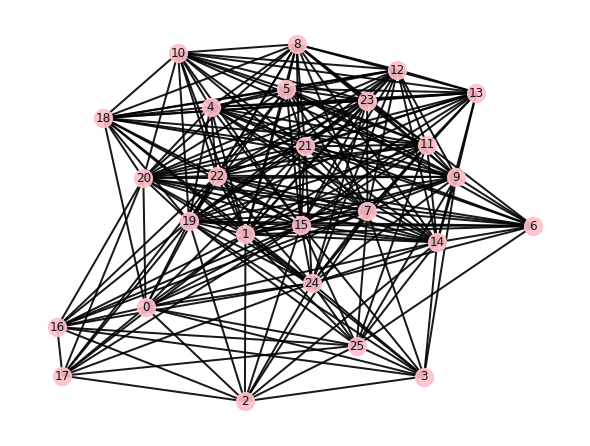

In [82]:
import matplotlib as mpl

G = nx.Graph()
G.add_edges_from(conf_links)
pos = nx.spring_layout(G)
plt.figure(figsize=(8,6))

cmap = plt.cm.plasma

nx.draw(
    G, pos, edge_color='black', width=2, linewidths=2,
    node_size=300, node_color='pink', alpha=0.9, arrowstyle="->",
    arrowsize=25,
    labels={node: node for node in G.nodes()}
)

# nodes = nx.draw_networkx_nodes(G, pos, node_size=300, node_color="indigo", alpha=)
# edges = nx.draw_networkx_edges(
#     G,
#     pos,
#     node_size=3,
#     arrowstyle="->",
#     arrowsize=10,
#     edge_color='black',
#     edge_cmap=cmap,
#     width=2,
# )
# set alpha value for each edge


ax = plt.gca()
ax.set_axis_off()
plt.show()

In [ ]:
relative_dist_graph = mds.matrix_mask(dist_matrix, p2p_graph)

# m = np.max(relative_dist_graph)
# relative_dist_graph /= m
# relative_dist_graph[relative_dist_graph == 0] = np.nan

In [ ]:
A = p2p_graph + np.eye(5)

In [ ]:
np.linalg.matrix_rank(relative_dist_graph)

In [ ]:
np.linalg.eigvals(relative_dist_graph)

In [ ]:
def rmse(A,B):
    rmse = np.sqrt(np.mean(((A-B)**2)))
    print("RMSE: %.2f" %rmse)
    return rmse

In [ ]:
from matrix_completion import svt_solve, nuclear_norm_solve, pmf_solve, biased_mf_solve

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

a = imp.fit_transform(relative_dist_graph)

In [ ]:
rmse(dist_matrix, a)

In [ ]:
X = Variable(dist_matrix.shape)
obj = Minimize(norm(X*PM1, 'fro') + norm((PU1.T)*X, 'fro')) # norm frobenius: information from graphs
constraints = [multiply(mat_mask, X) == multiply(mat_mask, np.array(UM))]
prob = Problem(obj, constraints)
prob.solve(solver=SCS)